In [1]:
from data_pipeline import main
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = main().set_index('cbsa')
df.head()

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p4323,p4324,p4325,p4326,p4327,p4328,p4329,p4330,p4331,gdp
cbsa,,,,,,,,,,,,,,,,,,,,,
winstonsalem_2017,2,2,2,3,3,3,6,6,6,3,...,7,7,7,12,12,12,23,23,23,29749.4
albuquerque_2016,1,1,1,1,1,1,3,3,3,2,...,1,1,1,1,1,1,1,1,1,43480.4
tulsa_2015,1,1,1,1,1,1,2,2,2,2,...,4,4,4,7,7,7,5,5,5,60542.7
cleveland_2016,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,4268.3
akron_2016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35699.9


In [3]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [4]:
below, above = np.percentile(df['gdp'], [(100/3), (200/3)])

In [5]:
def conditions(col):
    if col['gdp'] < below:
        return 'small'
    elif col['gdp'] > below and col['gdp'] < above:
        return 'medium'
    else:
        return 'large'

    
    
df['gdp_size'] = df.apply(conditions, 1)
df['sum_of_pixels'] = [sum(df.iloc[cbsa, 0:4332])/len(df.columns[0:4332]) for cbsa in range(len(df))]


small = df[df['gdp_size'] == 'small'].iloc[:, -1]
medium = df[df['gdp_size'] == 'medium'].iloc[:, -1]
large = df[df['gdp_size'] == 'large'].iloc[:, -1]
df['sum_of_pixels']

cbsa
winstonsalem_2017        29.544321
albuquerque_2016         49.422438
tulsa_2015               67.657202
cleveland_2016           77.927285
akron_2016               42.590028
allentown_2015           27.481994
palmbay_2015             18.547784
batonrouge_2016          80.905125
milwaukee_2016           91.427285
sandiego_2015            54.536011
bakersfield_2017         31.562327
durham_2016              31.505540
providence_2016          37.851801
deltona_2016             20.173823
vallejo_2017             14.245152
bakersfield_2015         31.108033
york_2015                18.578947
providence_2017          35.210526
charlotte_2017           83.087258
buffalo_2015             63.630886
sanantonio_2017         106.714681
madison_2017             23.515928
boston_2015              79.175208
flint_2017               30.183518
manchester_2015          17.601801
okc_2017                 89.033934
salemor_2016             10.563712
capecoral_2017           45.113573
shreveport_2017

/home/jrsilber/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


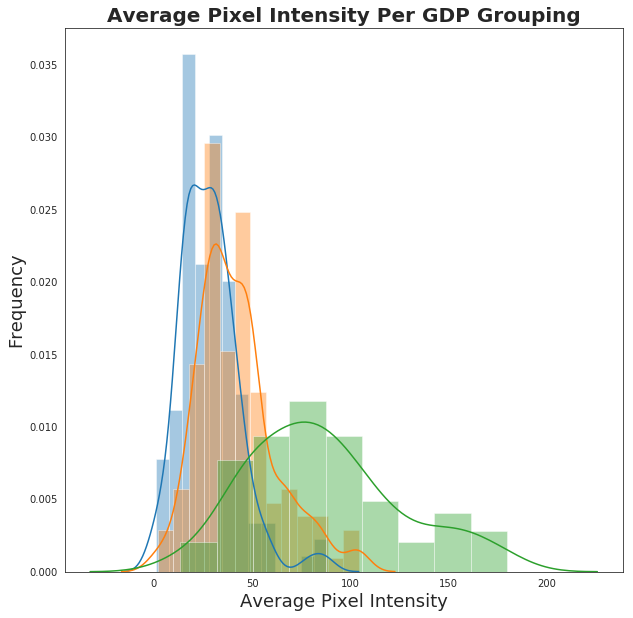

In [43]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(small)
sns.distplot(medium)
sns.distplot(large)
ax.set_xlabel('Average Pixel Intensity', fontsize=18)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_title('Average Pixel Intensity Per GDP Grouping', fontsize=20, weight='bold')
fig.savefig('Signal_Histogram')

In [35]:
#PCA CHARTS 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca

/home/jrsilber/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jrsilber/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-2.49120976e+01,  2.37684907e+00],
       [-7.03794984e+00,  6.90745014e+00],
       [ 1.29318488e+01, -6.05846318e+00],
       [ 2.42012764e+01, -2.74558235e+00],
       [-8.89762359e+00,  2.96564167e-01],
       [-2.48800739e+01, -7.12035731e+00],
       [-3.34118744e+01, -4.05215266e+00],
       [ 2.73905219e+01,  3.04536193e+01],
       [ 3.92869797e+01, -3.61222359e+01],
       [ 4.78288089e+00, -7.45415491e+00],
       [-2.26340005e+01,  2.27433135e+01],
       [-2.20899456e+01, -1.46953038e+01],
       [-1.35093006e+01,  2.58060688e+01],
       [-3.24617723e+01, -1.74130160e+01],
       [-3.85515173e+01, -5.29260155e+00],
       [-2.47098461e+01,  1.34077265e+01],
       [-3.58036753e+01, -2.99203191e+00],
       [-1.59458456e+01,  2.29785769e+01],
       [ 3.25070342e+01, -1.16094226e+01],
       [ 6.79836904e+00,  5.06330901e+00],
       [ 5.69528066e+01,  2.83774372e+01],
       [-3.00635330e+01, -1.44071477e+01],
       [ 2.83632462e+01, -1.57358352e+01],
       [-2.

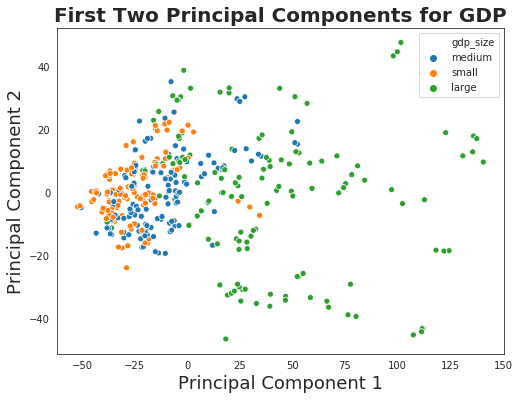

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=df['gdp_size'])
ax.set_ylabel('Principal Component 2', size=18)
ax.set_xlabel('Principal Component 1', size=18)
ax.set_title('First Two Principal Components for GDP', size=20, weight='bold')
fig.savefig('Two_Principal_Components')

In [28]:
len(df['gdp_size'])

399

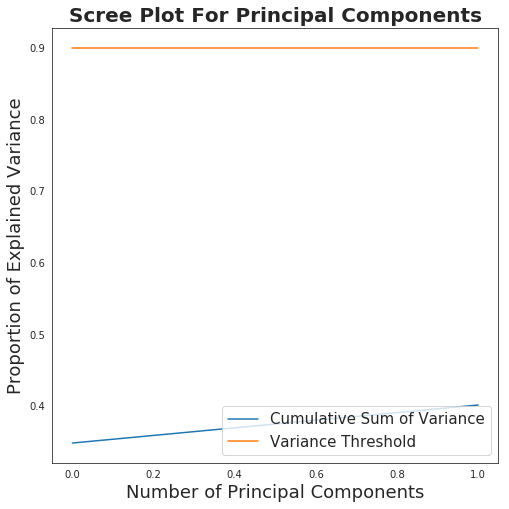

In [45]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 8))
sns.lineplot(x=np.arange(len(pca.explained_variance_ratio_)), y=np.cumsum(pca.explained_variance_ratio_))
sns.lineplot(x=np.arange(len(pca.explained_variance_ratio_)), y=0.9)
ax.set_title('Scree Plot For Principal Components', size=20, weight='bold')
ax.set_ylabel('Proportion of Explained Variance', size=18)
ax.set_xlabel('Number of Principal Components', size=18)
ax.legend(labels=(['Cumulative Sum of Variance', 'Variance Threshold']), loc='lower right', prop={'size': 15})
fig.savefig('scree_plot')

In [ ]:
#Data Exploration 